<a href="https://colab.research.google.com/github/mshinohar/aws-ml-enablement-handson/blob/main/%E7%B1%B3%E6%A0%AAPy03_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [3-1] IF/FOR/時間/文字列

## Ifの応用編、ラムダ式

In [ ]:
# 条件式が真のときに評価される式 if 条件式 else 条件式が偽のときに評価される式
# リスト
sample_list = ['aaa','bbb','ccc','ddd']
test1 = 1 if 'aaa' in sample_list else 0
test2 = 1 if 'eee' in sample_list else 0
print(test1,test2)

1 0


In [ ]:
# 辞書
sample_dict = {'aaa':10,'bbb':20,'ccc':30,'ddd':40}
test3 = sample_dict['aaa'] if 'aaa' in sample_dict else 0
test4 = sample_dict['eee'] if 'eee' in sample_dict else 0
print(test3,test4)

10 0


In [ ]:
#名前 = lambda 引数, 引数, ...: 式
# 応用　辞書＋ラムダ式
test5 = (lambda x,y,z: x[y] if y in x else z)(sample_dict, 'aaa', 0)

comp = lambda x,y,z: x[y] if y in x else z
test6 = comp(sample_dict, 'eee', 0)
print(test5,test6)

10 0


## For の内包表記

In [ ]:
data = [1, 2, 3, 4, 5]
# data配列の中身を2倍にする
newData = [d * 2 for d in data]
print(newData)

[2, 4, 6, 8, 10]


In [ ]:
deal = data.find_all("td", class_="deal textRight") # 出来高のリストを取得 
volume = [int(i) for i in 
          [re.sub('.*>([0-9]+)</.*', r'\1', s)
           for s in [s.replace(',', '')
            for s in [str(i)
             for i in deal]]]]
'''
str(i) for i in deal -> 中身をすべてstr型に変換
s.replace(',', '') for s in [xxx] -> リスト内の ',' を削除
re.sub('.*>([0-9]+)</.*', r'\1', s) for s in [xxx] -> リストから数字の部分を取得
int(i) for i in [xxx] -> 数字をint型に変換
'''
int(i) for i in [
 re.sub('.*>([0-9]+)</.*', r'\1', s) for s in [
   s.replace(',', '') for s in [str(i) for i in deal]
 ]]]


## 時間関連

In [ ]:
import datetime as datetime
import pytz

date1 =  datetime.datetime.now()
date2 =  datetime.datetime.now(pytz.timezone('US/Eastern'))
date3 = (datetime.datetime.now(pytz.timezone('Asia/Tokyo')).strftime("%Y/%m/%d %H:%M:%S"))
date4 = (datetime.datetime.now(pytz.timezone('US/Eastern')).date()
 + datetime.timedelta(days=-30))

print(date1)
print(date2)
print(date3)
print(date4)

2022-02-09 20:14:07.979180
2022-02-09 15:14:08.019916-05:00
2022/02/10 05:14:08
2022-01-10


In [ ]:
import time
start = time.time()

# 処理
time.sleep(1) # 1秒待つ

elapsed_time = time.time() - start
print("処理時間: {0}".format(elapsed_time) + "[sec]")

処理時間: 1.0012869834899902[sec]


In [ ]:
# 文字列 -> Date型
from datetime import datetime as dt
str_time1 = '10/29/2020'
print(type(str_time1),str_time1)
date_time1 = dt.strptime(str_time1, '%m/%d/%Y')
print(type(date_time1),date_time1)

# Date型-> 文字列
import datetime as datetime
date_time2 = datetime.datetime.now()
print(type(date_time2),date_time2)
str_time2 = date_time2.strftime("%Y/%m/%d %H:%M:%S")
print(type(str_time2),str_time2)

<class 'str'> 10/29/2020
<class 'datetime.datetime'> 2020-10-29 00:00:00
<class 'datetime.datetime'> 2022-02-09 20:16:43.540139
<class 'str'> 2022/02/09 20:16:43


In [ ]:
import datetime as datetime
import pytz

wk = datetime.datetime.now(pytz.timezone('Asia/Tokyo')).weekday()
print(['月','火','水','木','金','土','日'][wk])
wk

木


3

In [ ]:
import datetime as datetime
import pytz
import holidays

def us_market():
 ndate = datetime.datetime.now(pytz.timezone('US/Eastern'))
 tmin = ndate.hour*60+ndate.minute
 wk = ndate.weekday()
 if (ndate in holidays.US()): return 0  # holiday
 if (wk==5)|(wk==6):          return 0  # Sat/San
 if (tmin>240)&(tmin<570):    return 1  # US Stock PRE   4:00-9:30
 if (tmin>=570)&(tmin<=960):  return 2  # US Stock       9:30-16:00
 if (tmin>960)&(tmin<=1200):  return 3  # US Stock AFTER 16:00-20:00
 return 0

print(us_market())

2


## 数字、文字列の変換等

In [ ]:
num = 0.123456

# 書式化演算子
str_num1 = '%.2f'%(num)
print(str_num1)
# 組み込み関数format
str_num2 ='{:.2f}'.format(num)
print(str_num2)

0.12
0.12


In [ ]:
num = 0.5
str_num = '{:.2%}'.format(num)
print(str_num)

50.00%


In [ ]:
num = 1234567890
str_num = '{:,}'.format(num)
print(str_num)

1,234,567,890


In [ ]:
# 数字 -> 文字列 (K/M/B/T)
num_revenue = 274515000
conv_str = lambda x: '%.2f'%(x/float('1E'+str(3*'{:,}'.format(x).count(','))))+['','K','M','B','T']['{:,}'.format(x).count(',')]
str_revenue = conv_str(num_revenue)
print(str_revenue)

# 文字列 -> 数字
num_rev = float(str_revenue.translate(str.maketrans({'K':'E3','M':'E6','B':'E9','T':'E12'})))
print(num_rev)

274.51M
274510000.0


## CSV

- ダウやナスダック100で同じことをやってみましょう。
- ちなみにダウは si.tickers_dow()で取得可能、ダウのティッカーは^DJIになります。
- si.tickers_sp500()
- ナスダック100は同じく時価総額加重平均ですが、ダウは株価加重平均です。
- またナスダック100はyahoo finance 関数では取得できないので、自分でサイトを調べて入力する（コピペ）か、スクレイピングで取り出しましょう。
- ナスダック100はQQQと比較します。

In [ ]:
#pip install yfinance -t /content/drive/MyDrive/module

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')
import yfinance as yf
import pandas as pd
import os
output_dir = '/content/drive/MyDrive/output/'
if not os.path.isdir(output_dir): os.makedirs(output_dir)

df1 = yf.download('VOO', period = "ytd")
df1.to_csv(output_dir +'voo_data.csv', encoding='utf_8_sig')

df2 = pd.read_csv(output_dir+'voo_data.csv', index_col=0)

print('------ VOO DATA ------')
print(df1.tail())
print('------ CSV DATA ------')
print(df2.tail())

[*********************100%***********************]  1 of 1 completed
------ VOO DATA ------
                  Open        High         Low       Close   Adj Close   Volume
Date                                                                           
2022-02-07  413.230011  414.619995  409.899994  411.160004  411.160004  5620900
2022-02-08  410.720001  415.459991  409.350006  414.489990  414.489990  5565700
2022-02-09  418.549988  420.869995  418.350006  420.570007  420.570007  6284500
2022-02-10  414.929993  420.799988  411.140015  413.179993  413.179993  9260500
2022-02-11  413.149994  415.170013  404.000000  405.000000  405.000000  9090978
------ CSV DATA ------
                  Open        High         Low       Close   Adj Close   Volume
Date                                                                           
2022-02-07  413.230011  414.619995  409.899994  411.160004  411.160004  5620900
2022-02-08  410.720001  415.459991  409.350006  414.489990  414.489990  5565700
2022-

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')
import datetime as datetime
import pytz
import yahoo_fin.stock_info as si
import yfinance as yf
import matplotlib.pyplot as plt
import japanize_matplotlib 
import pandas as pd
from PIL import Image,ImageDraw,ImageFont
import IPython
import os
output_dir = '/content/drive/MyDrive/output/'
input_dir = '/content/drive/MyDrive/input/'
if not os.path.isdir(output_dir): os.makedirs(output_dir)

In [ ]:
today = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
str_post = today.strftime("_%Y%m%d")
if os.path.exists(output_dir +'sp500_data'+str_post+'.csv'):
  df_all = pd.read_csv(output_dir+'sp500_data'+str_post+'.csv', index_col=0)
else:
  sp500_ticker = si.tickers_sp500()
  df_all = yf.download(sp500_ticker, period = "ytd")['Adj Close']
  df_all.to_csv(output_dir +'sp500_data'+str_post+'.csv', encoding='utf_8_sig')

[*********************100%***********************]  505 of 505 completed


In [ ]:
sp500_ticker[0:10]

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE']

In [ ]:
df_all.head(3)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WM,WMB,WMT,WRB,WRK,WST,WTW,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-03,156.479996,18.75,236.779999,181.778397,134.029205,132.619995,366.290009,138.551285,406.156982,564.369995,177.149994,67.531319,244.009995,283.720001,88.580002,87.843750,24.206093,58.270000,57.389999,156.270004,166.710007,117.510002,236.669998,648.049988,54.070000,118.269997,129.360001,159.929993,11.88,150.240005,143.669998,226.690002,303.182770,286.380005,3408.090088,142.240005,395.489990,464.859985,292.686462,83.261505,...,57.270000,221.070328,73.709999,32.240002,76.266548,207.899994,43.191975,221.660004,252.110001,222.529999,51.930000,14.21,51.815712,92.290001,364.589996,53.060001,65.930000,96.089996,85.559998,50.503242,232.699997,162.740005,26.500000,144.649994,81.260002,43.956928,445.708649,235.570007,40.57,87.769997,67.940002,221.270004,62.843323,56.889999,116.889999,136.529999,129.130005,583.900024,64.239998,233.654770
2022-01-04,151.190002,19.02,237.050003,179.471344,133.771881,131.360001,361.589996,135.292801,403.254517,554.000000,175.550003,68.784660,245.149994,278.190002,88.110001,87.883408,24.275595,60.180000,59.000000,157.740005,167.429993,116.949997,242.580002,623.500000,55.450001,121.129997,132.399994,158.360001,12.07,144.419998,146.089996,227.839996,316.953827,282.769989,3350.439941,138.660004,391.100006,458.170013,293.714508,84.646370,...,58.770000,222.098663,75.760002,33.049999,77.621040,210.529999,44.701427,221.729996,250.429993,221.860001,53.279999,14.37,52.833454,97.699997,356.410004,53.480000,67.620003,95.849998,88.139999,52.514214,239.470001,164.300003,26.740000,142.000000,82.470001,45.528599,428.796661,238.669998,41.09,87.489998,68.370003,214.889999,65.207115,57.180000,118.129997,137.259995,130.440002,587.599976,66.070000,224.759048
2022-01-05,148.600006,18.68,236.449997,174.697418,134.474579,132.500000,338.200012,134.684937,396.152924,514.429993,172.839996,68.247513,243.059998,264.320007,88.330002,88.696312,23.163582,60.080002,58.189999,156.309998,164.289993,115.480003,235.639999,578.840027,54.770000,121.019997,129.309998,153.740005,12.09,136.149994,143.429993,225.139999,313.824951,264.570007,3287.139893,133.149994,376.940002,458.220001,292.446930,83.231613,...,58.459999,219.642654,74.190002,32.720001,77.314545,208.479996,43.872711,214.309998,243.509995,221.419998,52.840000,14.44,53.376904,96.550003,350.720001,54.000000,67.059998,96.959999,86.980003,52.056271,235.639999,161.839996,26.799999,143.919998,81.550003,45.936436,403.778534,237.009995,40.07,84.250000,69.040001,201.660004,66.018127,56.259998,116.519997,135.520004,130.009995,558.179993,66.220001,216.212769


In [ ]:
df_all = df_all.dropna(how='all')
df_all = (df_all/df_all.iloc[0]-1)*100
df_all = df_all.dropna(how='all', axis=1)

In [ ]:
df_all.tail(3)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WM,WMB,WMT,WRB,WRK,WST,WTW,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-09,-7.694270,0.053335,-1.942734,-3.024781,6.842383,7.766554,-13.751398,-5.818264,-12.464881,-7.551783,-5.046564,14.435791,-13.462560,-11.412662,-0.982166,1.748841,-5.065226,13.334478,8.747169,6.584753,-3.725035,-1.804104,-0.101409,-15.756498,8.359535,5.419805,-3.231293,-9.835551,-0.841754,-11.574813,-4.976678,4.631876,4.897122,-12.741813,-5.407722,-8.998877,-13.659003,0.677629,0.370200,-10.342719,...,4.330364,4.263199,-12.671275,10.980139,16.486190,-9.172676,-3.593203,-10.195798,-12.922931,9.755991,0.000000,8.374381,3.250535,0.400913,-8.072079,-5.785902,-17.366905,-1.842020,-4.394571,16.942989,-11.383752,-9.893084,14.981129,-4.811609,13.979818,7.264096,-8.285379,-2.950296,4.929751,6.858841,1.839859,1.776107,25.709457,-4.429602,-18.581574,-6.467444,-7.031675,-13.337906,13.542971,-13.423555
2022-02-10,-9.470854,-0.213338,-5.933780,-5.313283,6.476798,6.725983,-16.156603,-7.788656,-15.700079,-12.288039,-8.738355,13.191929,-15.765748,-15.931199,-3.409352,-0.516543,-7.667873,12.493569,8.416104,4.031486,-4.738773,-3.974135,-0.266195,-17.852018,8.415016,4.236072,-6.702225,-12.605508,-2.188554,-16.287279,-5.693598,0.939611,4.194574,-15.318811,-6.690551,-10.665077,-15.798119,-1.561756,-1.847186,-13.249222,...,3.387460,2.044448,-15.099712,11.290320,17.862945,-9.119765,-4.264626,-12.167284,-15.624132,6.003685,-1.213174,8.163264,2.362775,-2.611338,-9.860386,-7.237090,-17.958441,-4.256423,-5.703597,16.923184,-14.232916,-11.625905,13.735847,-5.924640,13.142998,6.172110,-10.356241,-3.816278,3.081094,7.303183,-1.265824,-2.133141,24.500097,-4.535064,-21.430407,-9.067602,-8.022929,-20.083921,15.379834,-14.673261
2022-02-11,-12.519170,-6.240000,-6.144946,-7.307520,5.932133,5.843764,-19.539165,-9.437867,-19.315683,-15.737904,-13.034150,12.836530,-16.196053,-19.769490,-3.171143,-0.175024,-10.786927,11.601164,5.401642,3.423556,-6.559302,-5.352737,-2.778129,-21.575493,4.586646,4.151521,-8.333332,-17.570182,-2.398989,-24.903493,-9.027634,1.107237,0.408085,-17.588522,-10.057246,-15.136323,-19.517562,-3.570962,-3.210416,-14.678457,...,1.850884,1.433787,-17.616335,11.305820,20.708226,-9.855695,-5.005504,-12.974831,-14.709852,5.046509,-2.156747,6.496126,2.798741,-5.303938,-11.459447,-8.716547,-18.762322,-5.055989,-6.609396,15.042115,-16.570691,-12.317192,15.358489,-6.560657,10.972432,5.398634,-11.866191,-5.645881,2.021197,4.671307,-1.221669,-12.003433,27.292764,-5.194231,-23.445118,-10.730244,-9.877646,-24.201066,13.574099,-14.878691


In [ ]:
df_all = df_all.sort_values(df_all.index[-1],axis=1,ascending=False)

In [ ]:
df_all.tail(3)

,HAL,OXY,MRO,EOG,SLB,XOM,HES,PXD,MPC,CTRA,PSX,APA,FANG,ATVI,VLO,DISCK,DVN,DISCA,BKR,MOS,LVS,CVX,PBCT,WMB,FOXA,MTB,WFC,OMC,AXP,ZION,PM,NLOK,ADM,GLW,FOX,MET,LMT,AFL,TSN,DE,...,ABMD,MSI,APTV,FFIV,ECL,ADSK,CTLT,LUMN,DHI,BR,GM,QRVO,NVDA,GNRC,ROK,ENPH,EFX,ISRG,ALGN,MHK,DPZ,DLR,TT,CDNS,LRCX,XYL,TRMB,ZBRA,AMD,TROW,TSLA,MRNA,CDAY,TER,ETSY,EPAM,NFLX,FB,PYPL,COP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-09,36.098382,29.748873,27.622997,25.211711,24.598617,25.709457,21.513213,18.690143,21.519946,16.147163,18.101399,19.599272,15.236060,20.884014,16.486190,20.821468,14.373490,17.804975,11.182529,11.395875,20.231663,15.537473,15.895620,14.981129,16.498404,15.671408,16.942989,21.965088,17.051843,13.542971,8.743335,16.824916,14.435791,15.488041,14.089729,12.151482,11.338759,13.334478,12.437355,12.935937,...,-13.751398,-10.817782,-16.111546,-15.447992,-16.747163,-11.412662,-16.732263,0.944881,-15.684972,-16.628901,-17.083533,-14.244491,-11.340926,-15.357418,-15.671557,-12.230956,-15.352115,-18.838891,-15.756498,-14.366477,-19.605214,-16.088868,-16.766750,-15.702123,-16.268301,-18.581574,-17.570378,-13.337906,-11.574813,-21.235485,-22.319094,-30.214849,-22.803507,-26.933958,-30.162432,-25.488944,-30.882030,-31.470434,-36.934441,25.999731
2022-02-10,35.097958,30.972315,26.911670,24.493444,23.871254,24.500097,20.328168,18.850659,21.443791,17.475729,18.114605,19.706596,16.613021,20.809847,17.862945,21.797481,14.592937,18.791947,10.338109,14.257277,20.077229,14.070091,16.226748,13.735847,16.896920,15.709321,16.923184,16.862903,16.521415,15.379834,9.756603,15.305738,13.191929,14.251152,14.461267,12.278894,8.767922,12.493569,11.480631,12.293282,...,-16.156603,-17.039971,-18.135277,-17.309991,-18.483225,-15.931199,-18.587838,-14.724409,-19.219079,-19.066041,-17.704755,-16.113648,-14.265795,-17.004399,-18.350708,-16.161560,-18.602113,-18.752780,-17.852018,-17.323474,-20.722315,-19.921178,-19.856300,-18.721341,-18.000996,-21.430407,-20.939088,-20.083921,-16.287279,-24.026107,-24.607014,-31.750693,-26.758149,-29.366082,-31.867764,-26.748676,-31.990225,-32.631299,-38.945319,24.589950
2022-02-11,39.391409,37.968453,31.327798,28.294765,27.950754,27.292764,24.951160,23.564660,23.378004,23.148186,22.976234,21.513289,21.208872,20.802435,20.708226,19.886130,17.774849,16.857483,16.771819,16.546409,16.254833,16.166352,15.509303,15.358489,15.103617,15.096366,15.042115,14.832859,13.779880,13.574099,12.926982,12.856059,12.836530,12.691588,12.575014,12.533717,11.644942,11.601164,11.583141,11.316451,...,-19.539165,-19.582693,-19.647049,-19.740473,-19.766787,-19.769490,-20.186358,-20.196847,-20.226107,-20.276321,-20.393982,-20.548200,-20.601904,-20.873213,-21.016607,-21.377063,-21.399646,-21.479170,-21.575493,-21.932927,-21.978593,-22.028667,-22.222223,-22.469425,-23.123259,-23.445118,-23.667512,-24.201066,-24.903493,-25.973897,-28.791945,-31.601786,-31.884885,-32.484498,-32.487019,-33.034104,-34.715504,-35.057899,-40.925412,NaN


In [ ]:
df_idx = yf.download('^GSPC', period = "ytd")['Adj Close']
df_idx = (df_idx/df_idx.iloc[0]-1)*100

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_idx.tail(3)

Date
2022-02-09   -4.365209
2022-02-10   -6.097703
2022-02-11   -8.217142
Name: Adj Close, dtype: float64

In [ ]:
df = pd.DataFrame()
###############################################################################################
df = pd.concat([df_idx, df_all.mean(axis='columns')], axis=1)
df = df.rename(columns={'Adj Close': '時価総額加重平均', df.columns[1]: '均等加重平均'})
for i in range(len(df.columns)):
 df = df.rename(columns={df.columns[i]: df.columns[i]+'\n('+'%.2f'%((df[df.columns[i]].iloc[-1]))+"%"+')'})

fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(ax=ax,rot=45,fontsize=10,grid=True,figsize=(9,4),style='o--').legend(bbox_to_anchor=(1, 1.05),fontsize=14)
ax.set_title('S&P500 年初来パフォ―マス比較\n[時価総額加重平均 vs 均等加重平均]',fontsize=16)
ax.set_xlabel('日付',fontsize=14)
ax.set_ylabel('上昇率 [%]',fontsize=14)
plt.savefig(output_dir+'chart1.png', bbox_inches="tight")
plt.close()

In [ ]:
df.tail()

,時価総額加重平均\n(-8.22%),均等加重平均\n(-4.85%)
Date,,
2022-02-07,-6.519046,-4.338989
2022-02-08,-5.733693,-3.449909
2022-02-09,-4.365209,-1.803313
2022-02-10,-6.097703,-3.353302
2022-02-11,-8.217142,-4.851388


In [ ]:
###############################################################################################
# BEST 10
df = df_all.loc[:,df_all.columns[:10]].copy()
for i in range(len(df.columns)):
 df = df.rename(columns={df.columns[i]: df.columns[i]+' ('+'%.2f'%((df[df.columns[i]].iloc[-1]))+"%"+')'})

fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(ax=ax,rot=45,fontsize=10,grid=True,figsize=(9,4),style='o--').legend(bbox_to_anchor=(1, 1.05),fontsize=14)
ax.set_title('S&P500 年初来パフォ―マス\nTOP10値上がり銘柄',fontsize=16)
ax.set_xlabel('日付',fontsize=14)
ax.set_ylabel('上昇率 [%]',fontsize=14)
plt.savefig(output_dir+'chart2.png', bbox_inches="tight")
plt.close()

In [ ]:
df.tail()

,HAL (36.12%),OXY (29.52%),MRO (27.62%),COP (25.96%),SLB (24.69%),EOG (24.66%),XOM (24.39%),MPC (21.75%),DISCK (21.43%),OMC (21.36%)
Date,,,,,,,,,,
2022-02-03,30.137556,28.783003,23.532893,23.180164,21.626736,23.521006,25.401321,17.225094,16.348111,5.129247
2022-02-04,33.138811,31.358660,27.445163,24.535729,21.406044,25.642675,28.124020,19.083153,16.388779,3.857083
2022-02-07,35.514792,32.002578,28.097211,25.986182,26.954602,26.736667,29.666349,21.580867,14.192760,4.763844
2022-02-08,32.388497,26.690274,25.133370,23.803722,23.017416,23.244747,26.314134,20.758447,13.786089,6.807415
2022-02-09,36.119213,29.523504,27.622997,25.959065,24.693485,24.659193,24.386217,21.748398,21.434325,21.356068


In [ ]:
###############################################################################################
# WORST 10
df = df_all.loc[:,df_all.columns[-10:]].copy()
for i in range(len(df.columns)):
 df = df.rename(columns={df.columns[i]: df.columns[i]+' ('+'%.2f'%((df[df.columns[i]].iloc[-1]))+"%"+')'})

fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(ax=ax,rot=45,fontsize=10,grid=True,figsize=(9,4),style='o--').legend(bbox_to_anchor=(1, 1.05),fontsize=14)
ax.set_title('S&P500 年初来パフォ―マス\nTOP10値下がり銘柄',fontsize=16)
ax.set_xlabel('日付',fontsize=14)
ax.set_ylabel('上昇率 [%]',fontsize=14)
plt.savefig(output_dir+'chart3.png', bbox_inches="tight")
plt.close()
###############################################################################################

In [ ]:
df.tail()

,TSLA (-28.79%),MRNA (-31.60%),CDAY (-31.88%),TER (-32.48%),ETSY (-32.49%),EPAM (-33.03%),NFLX (-34.72%),FB (-35.06%),PYPL (-40.93%),COP (nan%)
Date,,,,,,,,,,
2022-02-07,-24.374468,-31.814507,-26.672389,-31.232314,-35.378455,-30.225788,-32.688282,-33.564720,-37.719297,25.986177
2022-02-08,-23.152580,-34.775582,-26.338859,-29.931973,-32.725194,-28.987854,-32.448901,-34.961899,-38.309223,23.803726
2022-02-09,-22.319094,-30.214849,-22.803507,-26.933958,-30.162432,-25.488944,-30.882030,-31.470434,-36.934441,25.999731
2022-02-10,-24.607014,-31.750693,-26.758149,-29.366082,-31.867764,-26.748676,-31.990225,-32.631299,-38.945319,24.589950
2022-02-11,-28.791945,-31.601786,-31.884885,-32.484498,-32.487019,-33.034104,-34.715504,-35.057899,-40.925412,NaN


In [ ]:
### 縦長まとめ画像 ############################################################################
# ここは変えてください ##
icon_img = input_dir+'tommy_icon2.png'

jap_font = '/content/drive/MyDrive/fonts/meiryo.ttc'
if not os.path.exists(jap_font):
  jap_font = '/content/drive/MyDrive/module/japanize_matplotlib/fonts/ipaexg.ttf'

x_width = 960
y_width = 1280
im = Image.new('RGB', (x_width, y_width), (255,255,255))
draw = ImageDraw.Draw(im)
draw.rectangle([(10, 10), (950, 180)], fill=(231, 239, 252))
# アイコン ##########################################################
if os.path.exists(icon_img):
  im.paste(Image.open(icon_img).resize((120, 120)).copy(), (30, 40))
#####################################################################

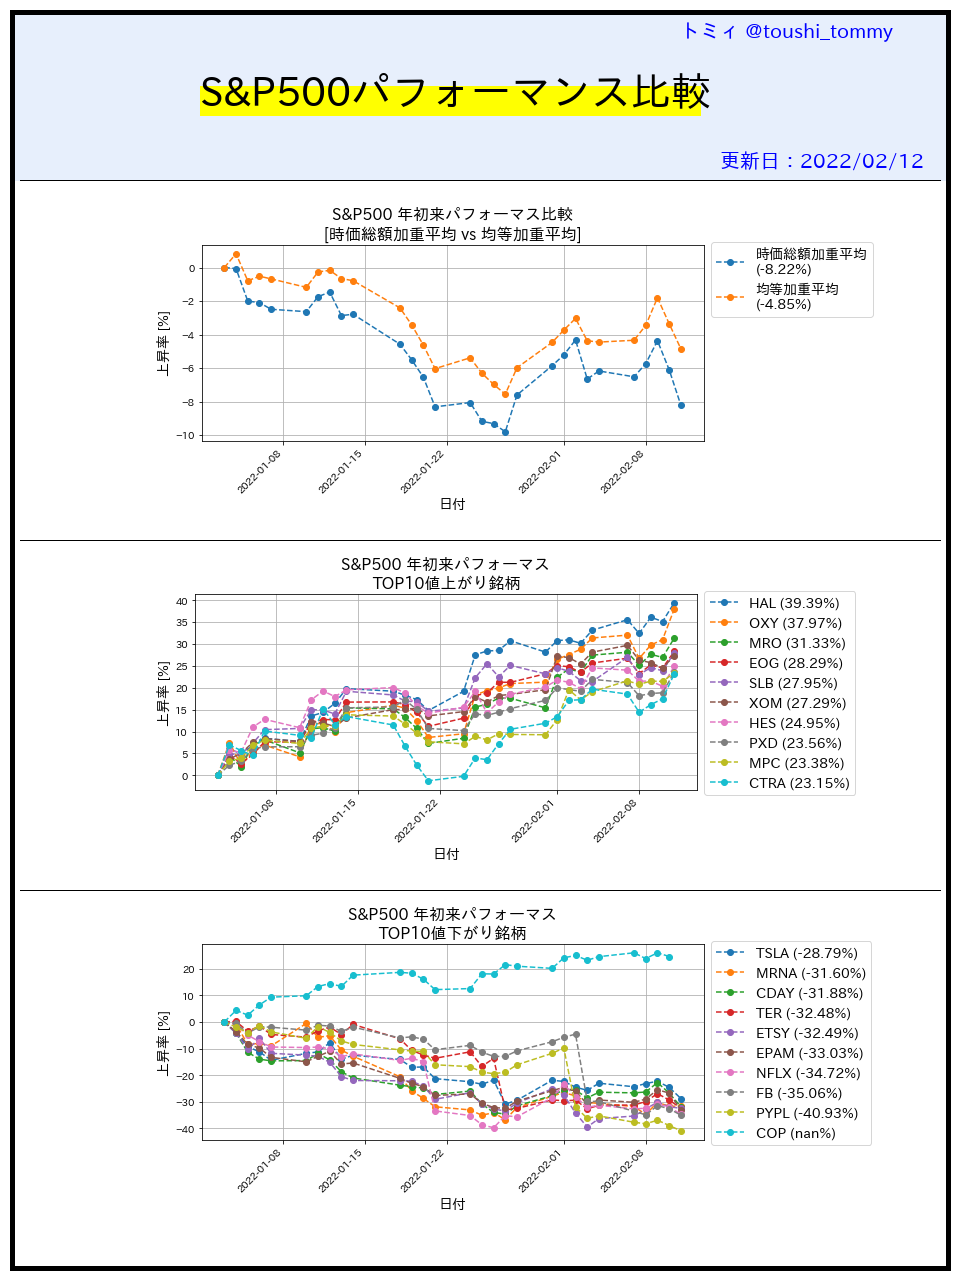

In [ ]:
draw.line((200,100, 700,100), fill='yellow', width=30)
draw.text((200, 70), 'S&P500パフォーマンス比較', 'black', font=ImageFont.truetype(jap_font, 40))
draw.text((720, 150), '更新日：'+today.strftime("%Y/%m/%d"), 'blue', font=ImageFont.truetype(jap_font, 20))

# ここは変えてください ##
draw.text((680, 20), 'トミィ @toushi_tommy', 'blue', font=ImageFont.truetype(jap_font, 20))

draw.rectangle([(10, 10), (950, 1270)], outline='black', width=5)

draw.line((20,180, 940,180), fill='black', width=1)
im.paste(Image.open(output_dir+'chart1.png').copy(), (150, 200))
draw.line((20,540, 940,540), fill='black', width=1)
im.paste(Image.open(output_dir+'chart2.png').copy(), (150, 550))
draw.line((20,890, 940,890), fill='black', width=1)
im.paste(Image.open(output_dir+'chart3.png').copy(), (150, 900))

im.save(output_dir+'out.png')
IPython.display.Image(output_dir+'out.png')

# [3-2] 銘柄一括データDataFrame処理

# [3-3] 投資信託のデータ比較

In [ ]:
import yahoo_fin.stock_info as si
import yfinance as yf

In [ ]:
import pandas as pd
# 投信総合検索ライブラリー
# https://toushin-lib.fwg.ne.jp/FdsWeb/
# eMaxis Slim SP500
# SBI VOO
csv_file = 'https://toushin-lib.fwg.ne.jp/FdsWeb/FDST030000/csv-file-download?isinCd=JP90C000GKC6&associFundCd=03311187'
data = pd.read_csv(csv_file, index_col=0, encoding='SHIFT-JIS')
data.tail()

,基準価額(円),純資産総額（百万円）,分配金,決算期
年月日,,,,
2022年02月03日,18315,986538,NaN,NaN
2022年02月04日,17955,969819,NaN,NaN
2022年02月07日,18089,978607,NaN,NaN
2022年02月08日,18028,976604,NaN,NaN
2022年02月09日,18220,988706,NaN,NaN


In [ ]:
import pandas as pd
from datetime import datetime as dt
toushin = {'https://toushin-lib.fwg.ne.jp/FdsWeb/FDST030000/csv-file-download?isinCd=JP90C000GKC6&associFundCd=03311187':'投信:eMaxisS&P500',
          'https://toushin-lib.fwg.ne.jp/FdsWeb/FDST030000/csv-file-download?isinCd=JP90C000J569&associFundCd=89311199':'投信:SBI VOO'}

df_toushin = pd.DataFrame()
for i in range(len(list(toushin.keys()))):           
    data = pd.read_csv(list(toushin.keys())[i], index_col=0, encoding='SHIFT-JIS')
    data['Date'] = [s for s in [dt.strptime(str(s), '%Y年%m月%d日') for s in list(data.index)]]
    data.set_index('Date', inplace=True)
    data = data.rename(columns={'基準価額(円)':toushin[list(toushin.keys())[i]]})
    data.drop(['純資産総額（百万円）', '分配金', '決算期'], axis=1, inplace = True)
    df_toushin = pd.concat([df_toushin, data], axis=1)

df_toushin.tail()

,投信:eMaxisS&P500,投信:SBI VOO
Date,,
2022-02-03,18315,16778.0
2022-02-04,17955,16469.0
2022-02-07,18089,16581.0
2022-02-08,18028,16533.0
2022-02-09,18220,16703.0


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')
import yfinance as yf
etfs = ['^GSPC','VOO','SPY','IVV']
df_etf = yf.download(etfs, period = '1y')['Close']
df_chart = pd.concat([df_toushin, df_etf], axis=1)
df_chart.tail()

[*********************100%***********************]  4 of 4 completed


,投信:eMaxisS&P500,投信:SBI VOO,IVV,SPY,VOO,^GSPC
Date,,,,,,
2022-02-03,18315.0,16778.0,448.600006,446.600006,410.589996,4477.439941
2022-02-04,17955.0,16469.0,450.850006,448.700012,412.519989,4500.529785
2022-02-07,18089.0,16581.0,449.250000,447.260010,411.160004,4483.870117
2022-02-08,18028.0,16533.0,452.820007,450.940002,414.489990,4521.540039
2022-02-09,18220.0,16703.0,458.859985,456.850006,420.029999,4580.750000


In [ ]:
# すべてにデータが入っている場所を取得し、最初の日程を検索
df_null = df_chart.isnull().any(axis=1)
df_date = df_null[df_null == False]
first_loc = df_chart.index.get_loc(df_date.index[0])
# データが揃い始める以前のデータを削除
df_chart = df_chart[first_loc:]
df_chart.head()

,投信:eMaxisS&P500,投信:SBI VOO,IVV,SPY,VOO,^GSPC
Date,,,,,,
2021-02-09,14202.0,13040.0,391.720001,390.250000,358.779999,3911.229980
2021-02-10,14113.0,12961.0,391.559998,390.079987,358.640015,3909.879883
2021-02-11,NaN,NaN,392.220001,390.709991,359.220001,3916.379883
2021-02-12,14151.0,12992.0,394.179993,392.640015,361.049988,3934.830078
2021-02-15,14269.0,13105.0,NaN,NaN,NaN,NaN


## graph

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')
import datetime as datetime
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from matplotlib.font_manager import FontProperties
import pandas as pd
import yfinance as yf
import numpy as np
import japanize_matplotlib 
import os
from datetime import datetime as dt

#　設定個所 ###################################################
# 比較対象
# S&P500
title = '過去１年「S&P500 ETF・投資信託」の値動き'
etfs = ['^GSPC','VOO','SPY','IVV']

In [ ]:
# 投資信託を探すサイト
# https://toushin-lib.fwg.ne.jp/FdsWeb/FDST999900
toushin = {'https://toushin-lib.fwg.ne.jp/FdsWeb/FDST030000/csv-file-download?isinCd=JP90C000GKC6&associFundCd=03311187':'投信:eMaxisS&P500',
        'https://toushin-lib.fwg.ne.jp/FdsWeb/FDST030000/csv-file-download?isinCd=JP90C000J569&associFundCd=89311199':'投信:SBI VOO'}

In [ ]:
# 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
df_etf = yf.download(etfs, period = '1y')['Close']

[*********************100%***********************]  4 of 4 completed


In [ ]:
# フォント
jap_font = '/content/drive/MyDrive/module/japanize_matplotlib/fonts/ipaexg.ttf'

df_toushin = pd.DataFrame()
for i in range(len(list(toushin.keys()))):           
    data = pd.read_csv(list(toushin.keys())[i], index_col=0, encoding='SHIFT-JIS')
    data['Date'] = [s for s in [dt.strptime(str(s), '%Y年%m月%d日') for s in list(data.index)]]
    data.set_index('Date', inplace=True)
    data = data.rename(columns={'基準価額(円)':toushin[list(toushin.keys())[i]]})
    data.drop(['純資産総額（百万円）', '分配金', '決算期'], axis=1, inplace = True)
    df_toushin = pd.concat([df_toushin, data], axis=1)

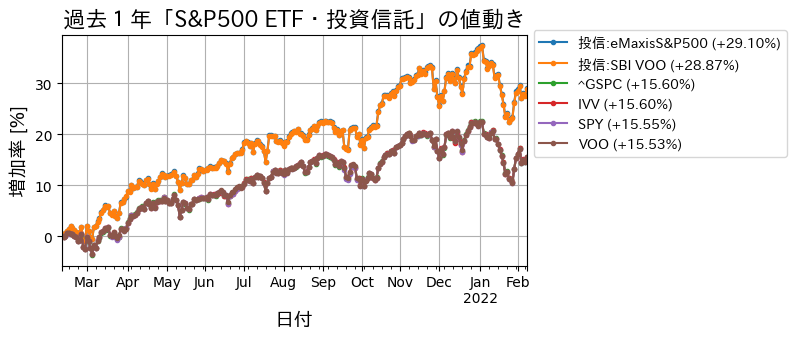

In [ ]:
# 投資信託は１日ずれる為、値をずらす
df_toushin = df_toushin.shift(-1)
df_chart = pd.concat([df_toushin, df_etf], axis=1)

# すべてにデータが入っている場所を取得し、最初の日程を検索
df_null = df_chart.isnull().any(axis=1)
df_date = df_null[df_null == False]
first_loc = df_chart.index.get_loc(df_date.index[0])
# 最後の投信日以降を消してパフォーマンスを計算
last_loc = df_chart.index.get_loc(df_toushin.index[-2])
# データが揃い始める以前のデータを削除
df_chart = df_chart[first_loc:last_loc+1]
df_chart.interpolate(inplace=True)

# 初日からのパーセントに変更
df_chart = (df_chart/df_chart.iloc[0]-1)*100
# パフォーマンス順に並び替え
df_chart.sort_values(df_chart.index[-1],axis=1,ascending=False,inplace=True)

plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111)

# ラベルに上昇率を追加
for i in range(len(df_chart.columns)):
  df_chart.rename(columns={df_chart.columns[i]: df_chart.columns[i]+' ('+'{:+.2f}'.format(df_chart[df_chart.columns[i]].iloc[-1])+'%)'}, inplace=True)
df_chart.plot(ax=ax,grid=True,figsize=(6,3),style='.-').legend(bbox_to_anchor=(1, 1.05), prop=FontProperties(fname=jap_font,size=10))

ax.set_title(title, fontproperties=FontProperties(fname=jap_font,size=16))
ax.set_xlabel('日付', fontproperties=FontProperties(fname=jap_font,size=14))
ax.set_ylabel('増加率 [%]', fontproperties=FontProperties(fname=jap_font,size=14))
plt.show()

課題　比較対象をVTI、QQQなどに変更してグラフを作ってみてください。

## 為替手数料を考慮したチャート比較

# [3-4] スクリーニング出力

In [ ]:
# url = "https://finance.yahoo.com/screener/predefined/day_gainers"
##############################################
output_dir = '/content/drive/MyDrive/output/'
font_dir   = '/content/drive/MyDrive/fonts/'
##############################################
import os
if not os.path.isdir(output_dir): os.makedirs(output_dir)
import requests
import json
import pandas as pd
from matplotlib.font_manager import FontProperties
from PIL import Image, ImageDraw, ImageFont
import IPython
import time

# 最大出力カウント設定 ###############################
max_out = 25
# スクリーニングページ ###############################
url = "https://finance.yahoo.com/screener/predefined/day_gainers"
######################################################

In [ ]:
url_base = url+'?offset=OFFSET&count=COUNT'
flag = 1
page_cnt = 250 # MAX 250
offset = 0
list_json=[]
while flag > 0:
    if offset!=0:time.sleep(3)
    url = url_base.replace("OFFSET", str(offset))
    cnt=max_out-offset if (len(list_json)+page_cnt)>max_out else page_cnt
    url = url.replace("COUNT",str(cnt))
    offset += page_cnt
    response = requests.get(url, headers={'User-Agent': 'Custom'})
    data = str(response.text)
    json_beg = data.find('"results":{"rows"')+18
    json_end = json_beg+1
    while data[json_end] != ']':json_end += 1
    str_json = data[json_beg: json_end+1]
    list_json_tmp = json.loads(str_json)
    list_json = list_json + list_json_tmp
    if len(list_json_tmp)!=page_cnt:flag = 0

In [ ]:
list_json[0]

{'averageDailyVolume3Month': {'fmt': '2.923M',
  'longFmt': '2,923,488',
  'raw': 2923488},
 'currency': 'USD',
 'fiftyTwoWeekHigh': {'fmt': '19.75', 'raw': 19.75},
 'fiftyTwoWeekLow': {'fmt': '6.42', 'raw': 6.42},
 'longName': 'Tritium DCFC Limited',
 'marketCap': {'fmt': '2.404B', 'longFmt': '2,403,654,400', 'raw': 2403654400},
 'priceHint': 2,
 'quoteType': 'EQUITY',
 'regularMarketChange': {'fmt': '6.16', 'raw': 6.16},
 'regularMarketChangePercent': {'fmt': '64.57%', 'raw': 64.57023},
 'regularMarketOpen': {'fmt': '13.59', 'raw': 13.59},
 'regularMarketPrice': {'fmt': '15.70', 'raw': 15.7},
 'regularMarketVolume': {'fmt': '105.873M',
  'longFmt': '105,872,894',
  'raw': 105872894},
 'shortName': 'Tritium DCFC Limited',
 'symbol': 'DCFC'}

In [ ]:
######################################################
jap_font = '/content/drive/MyDrive/module/japanize_matplotlib/fonts/ipaexg.ttf'
japb_font = '/content/drive/MyDrive/module/japanize_matplotlib/fonts/ipaexg.ttf'
jap2_font = font_dir+'meiryo.ttc'
jap2b_font = font_dir+'meiryob.ttc'
if os.path.exists(jap2_font): jap_font = jap2_font
if os.path.exists(jap2b_font): japb_font = jap2b_font
######################################################
outfile = output_dir+'out.png'
######################################################
def xycenter(xp, yp, xw, yw, tx, fn):
 x,y = draw.textsize(tx,fn)
 return xp+(xw-x)/2, yp+(yw-y)/2
######################################################

In [ ]:
# 出力データ・設定 ###################################
df = pd.DataFrame(
{ "No." : range(1,len(list_json)+1),
  "Ticker" : [s['symbol'] for s in list_json],
 "Name" : [s['longName'][:20] for s in list_json], 
 "時価総額" : [s['marketCap']['fmt'] if 'marketCap' in s else 'N/A' for s in list_json],
 "PER" : [s['trailingPE']['fmt'] if 'trailingPE' in s else 'N/A' for s in list_json],
 "出来高" : [s['regularMarketVolume']['fmt'] for s in list_json],
 "出来高\n(3ヵ月)" : [s['averageDailyVolume3Month']['fmt'] for s in list_json],
 "52週Lo" : [s['fiftyTwoWeekLow']['fmt'] for s in list_json],
 "株価" : [s['regularMarketPrice']['fmt'] for s in list_json],
 "52週Hi" : [s['fiftyTwoWeekHigh']['fmt'] for s in list_json],
 "前日比" : [s['regularMarketChangePercent']['fmt'] for s in list_json]
 }
)
df.head()

,No.,Ticker,Name,時価総額,PER,出来高,出来高\n(3ヵ月),52週Lo,株価,52週Hi,前日比
0,1,DCFC,Tritium DCFC Limited,2.404B,N/A,105.873M,2.923M,6.42,15.70,19.75,64.57%
1,2,BPCGF,Banco Comercial Port,4.493B,41.29,"47,300","11,427",0.1400,0.2478,0.2500,33.92%
2,3,MLYBY,Malayan Banking Berh,31.062B,16.55,"21,901","5,841",3.35,5.23,6.74,26.79%
3,4,DOCS,"Doximity, Inc.",11.584B,93.89,13.068M,2.8M,39.92,61.78,107.79,24.03%
4,5,GDS,GDS Holdings Limited,8.674B,N/A,3.444M,1.392M,34.95,46.41,116.76,19.06%


In [ ]:
######################################################
# カラム毎の横サイズ
x_width = {"No." :40,"Ticker" :80,"Name" :200,
       "時価総額" :80,"PER" :80,"出来高" :90,"出来高\n(3ヵ月)" :90,
       "52週Lo" :80,"株価" :80,"52週Hi" :80,"前日比" :80
}
y_height_hd = 50 # ヘッダ用 縦サイズ
y_height = 30 # 縦サイズ
split_line = [1,3,5,7,10] # 枠線作成時に縦に線を引く場所
color_cel = ["前日比"] # 出力時に数字に応じて色付け
######################################################

In [ ]:
im = Image.new('RGB', (sum(x_width.values())+20, y_height_hd+(len(df))*y_height+20), 'white')
draw = ImageDraw.Draw(im)

x_start = 10
y_start = 10
xpos = x_start
ypos = y_start

# ヘッダ出力 #####
font_head=ImageFont.truetype(japb_font, 16)
for i in x_width:
 draw.rectangle([(xpos, ypos), (xpos+x_width[i], ypos+y_height_hd)], fill=(247, 203, 77), outline=(0,0,0),  width=1)
 draw.text((xycenter(xpos,ypos,x_width[i],y_height_hd,i,font_head)),i, (0,0,0),font=font_head)
 xpos+=x_width[i]

# データ出力 ####
font_txt=ImageFont.truetype(jap_font, 16)
ypos+=y_height_hd
for i in range(len(df)):
 xpos = x_start
 draw.rectangle([(xpos, ypos), (xpos+sum(x_width.values()), ypos+y_height)], outline=(0,0,0),  width=1
   , fill=((255,255,255) if i%2 == 0 else (254, 248, 227)))

 # データ ####
 for j in x_width:
   draw.rectangle([(xpos, ypos), (xpos+x_width[j], ypos+y_height)], outline=(0,0,0),  width=1)
   txt_color = (0,0,0) if j not in color_cel else 'red' if str(df[j][i])[:1]=='-' else 'blue'
   draw.text((xycenter(xpos,ypos,x_width[j],y_height,str(df[j][i]),font_txt)),str(df[j][i]), txt_color,font=font_txt)
   xpos+=x_width[j]
 ypos+=y_height

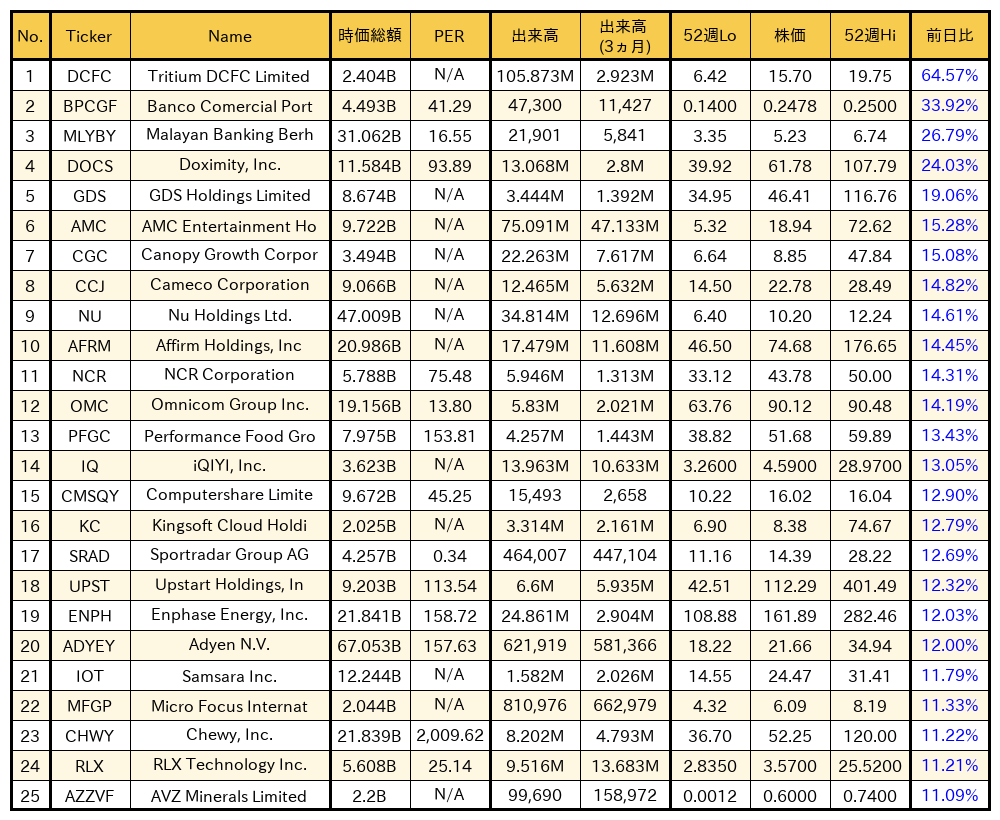

In [ ]:
######################################################
# 枠線
# 外枠
draw.rectangle([(x_start, y_start), (xpos, y_start+y_height_hd)], outline='black', width=3)
# ヘッダ枠
draw.rectangle([(x_start, y_start), (xpos, ypos)], outline='black', width=3)
# 縦線
for i in split_line:
 draw.line((x_start+sum(list(x_width.values())[0:i]), y_start, x_start+sum(list(x_width.values())[0:i]), ypos), fill='black', width=3)

im.save(outfile)
IPython.display.Image(outfile)